In [316]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.ticker as tck
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as st
import warnings
import scikit_posthocs as sp
warnings.filterwarnings("ignore", category=FutureWarning) 

In [317]:
xlsx_df = pd.read_excel('./Гели-кожа, цифры.xlsx', sheet_name='Планиметрия расчет')
xlsx_df = xlsx_df.fillna(True)
xlsx_df

,Группа,planimetry_1,planimetry_2,planimetry_3,planimetry_4,planimetry_5
0,СДК7_minus,19.278152,True,True,True,True
1,СДК7_minus,18.611277,16.50331,11.323275,True,True
2,СДК7_minus,20.649486,True,9.646226,True,True
3,СДК7_minus,22.363243,21.55337,11.169624,True,True
4,СДК7_minus,20.365795,18.653324,10.432006,True,True
...,...,...,...,...,...,...
69,ГОЦ21,24.75014,True,True,True,True
70,ГОЦ21,20.822483,True,True,True,True
71,True,True,True,True,True,True
72,True,True,True,True,True,True


# Раны сравнение

In [318]:
CDK_wo_7 = [20.38687781, 18.45912746, 10.99594555]
CDK_wo_14 = [21.80383733, 17.64777706, 12.19339458, 4.480650813]
CDK_wo_21 = [23.36861689,  17.78090738, 10.36390575, 5.14883839, 2.04]
CDK_w_7 = [23.15710408,  19.63259523, 11.78597676]
CDK_w_14 = [22.88,  20.54, 15.10984706, 8.824456138]
CDK_w_21 = [20.22,  19.43, 13.20102899, 6.079535278, 2,936557143]
GCF_7 = [21.86,  17.75]
GCF_14 = [21.96771998,  19.49686767,  14.59857312,  9.414336913]
GCF_21 = [21.88041618,  20.82579287,  14.14393183, False, 1.722536274]
GEF_7 = [20.53780855,  20.29798818, 12.62553866]
GEF_14 = [21.15506447, 19.3388171, 13.41459664, 6.364934207]
GEF_21 = [21.33975481,  22.07191337, 16.52690688, 6.834948947, 3.033155153]

# 1st planimetry
wo_DM_0 = np.array([CDK_wo_7[0], CDK_wo_14[0], CDK_wo_21[0]]).mean()
w_DM_0 = np.array([CDK_w_7[0], CDK_w_14[0], CDK_w_21[0]]).mean()
GCF_all_0 = np.array([GCF_7[0], GCF_14[0], GCF_21[0]]).mean()
GEF_all_0 = np.array([GEF_7[0], GEF_14[0], GEF_21[0]]).mean()

# 2nd planimetry
wo_DM_1 = np.array([CDK_wo_7[1], CDK_wo_14[1], CDK_wo_21[1]]).mean()
w_DM_1 = np.array([CDK_w_7[1], CDK_w_14[1], CDK_w_21[1]]).mean()
GCF_all_1 = np.array([GCF_7[1], GCF_14[1], GCF_21[1]]).mean()
GEF_all_1 = np.array([GEF_7[1], GEF_14[1], GEF_21[1]]).mean()

# 3rd planimetry
wo_DM_2 = np.array([CDK_wo_7[2], CDK_wo_14[2], CDK_wo_21[2]]).mean()
w_DM_2 = np.array([CDK_w_7[2], CDK_w_14[2], CDK_w_21[2]]).mean()
GCF_all_2 = np.array([GCF_14[2], GCF_21[2]]).mean()
GEF_all_2 = np.array([GEF_7[2], GEF_14[2], GEF_21[2]]).mean()

# 4th planimetry
wo_DM_3 = np.array([CDK_wo_14[3], CDK_wo_21[3]]).mean()
w_DM_3 = np.array([CDK_w_14[3], CDK_w_21[3]]).mean()
GCF_all_3 = np.array([GCF_14[3], GCF_21[3]]).mean()
GEF_all_3 = np.array([GEF_14[2], GEF_21[3]]).mean()

# 5th planimetry
wo_DM_4 = np.array([CDK_wo_21[4]]).mean()
w_DM_4 = np.array([CDK_w_21[4]]).mean()
GCF_all_4 = np.array([GCF_21[4]]).mean()
GEF_all_4 = np.array([GEF_21[4]]).mean()

In [319]:
# Dynamics by groups
no_DM = [wo_DM_0, wo_DM_1, wo_DM_2, wo_DM_3, wo_DM_4]
DM = [w_DM_0, wo_DM_1, w_DM_2, w_DM_3, wo_DM_4]
GCF_all = [GCF_all_0, GCF_all_1, GCF_all_2, GCF_all_3, GCF_all_4]
GEF_all = [GEF_all_0, GEF_all_1, GEF_all_2, GEF_all_3, GEF_all_4]
group = ['Control', 'Diabetes', 'Gel-control', 'Gel experiment']
df = [no_DM, DM, GCF_all, GEF_all]

In [320]:
new_df = pd.DataFrame(df)
new_df['group'] = group
new_df = new_df.transpose()
new_df = new_df.rename(columns={0:'Control', 1:'Diabetes', 2:'Gel_control', 3:'Gel_experiment'})
new_df = new_df.drop('group')
new_df


,Control,Diabetes,Gel_control,Gel_experiment
0,21.853111,22.085701,21.902712,21.010876
1,17.962604,17.962604,19.357554,20.569573
2,11.184415,13.365618,14.371252,14.189014
3,4.814745,7.451996,4.707168,10.124773
4,2.04,2.04,1.722536,3.033155


Text(0, 0.5, 'Размер ран')

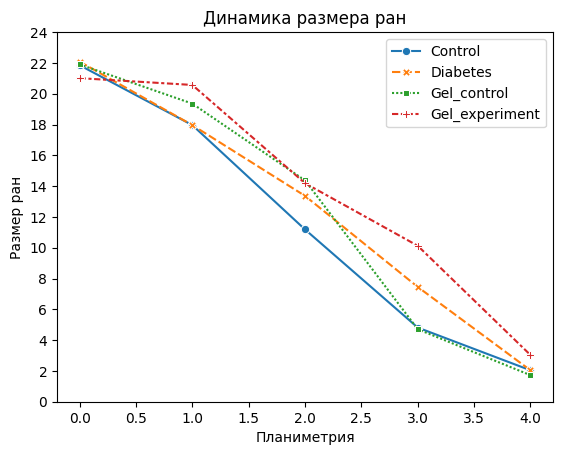

In [321]:
ax = sns.lineplot(new_df, markers=True)
plt.title('Динамика размера ран')
plt.yticks(np.arange(0,25,step=2))
plt.xlabel('Планиметрия')
plt.ylabel('Размер ран')


Полная статистика

In [322]:
# First planimetry
DMK_wo = [19.27815172, 18.61127663, 20.64948604, 22.36324327, 20.36579498, 21.05331419, 21.45892239, 21.90587857, 24.09027607,
          20.88180264, 20.7478339, 21.73831042, 23.19803967, 22.85556978, 25.84909662, 22.59474038, 24.19072307, 21.52353178]
DMK_W = [23.40637945, 23.3295144, 22.57062518, 24.51997756, 21.9590238, 26.86474734, 22.22356012,
         23.40488272, 21.30144578, 21.0191905, 22.43950111, 20.56, 20.61, 22.35, 18.81, 18.76]
GCF = [23.36, 23.91, 24.07, 20.55, 19.08, 20.19, 24.83212425, 22.97018283, 22.33819385,
       20.93630011, 18.76179884, 21.69777939, 20.9761466, 19.86226458, 22.06394875, 24.80194157]
GEC = [20.93201005, 18.09127601, 20.09914914, 21.5434977, 21.04099729, 21.51992115, 21.90779752, 18.06005551, 18.79205687,
       20.4174273, 25.82949975, 21.92354985, 21.92131267, 20.14504728, 20.3962342, 20.00331183, 24.75013993, 20.82248295]

In [323]:
scores = DMK_wo + DMK_W + GCF + GEC
groups = np.repeat(['Здоровый контроль', 'Диабет', 'Гель контроль', 'Гель опыт'], repeats=[len(DMK_wo), len(DMK_W), len(GCF), len(GEC)])

tukey = pairwise_tukeyhsd(scores, groups)
print(tukey) 

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1          group2      meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------
Гель контроль         Гель опыт  -0.8892 0.5431 -2.6433  0.865  False
Гель контроль            Диабет    0.233 0.9863  -1.572  2.038  False
Гель контроль Здоровый контроль  -0.0469 0.9999 -1.8011 1.7072  False
    Гель опыт            Диабет   1.1222 0.3387  -0.632 2.8764  False
    Гель опыт Здоровый контроль   0.8422 0.5629 -0.8596  2.544  False
       Диабет Здоровый контроль  -0.2799 0.9747 -2.0341 1.4742  False
---------------------------------------------------------------------


In [324]:
K = st.kruskal(DMK_wo, DMK_W, GCF, GEC)
K

KruskalResult(statistic=4.584434498437076, pvalue=0.20488144271132822)

Вывод: статистически значимые различия на первой планиметрии отсутствуют

In [ ]:
# Second planimetry
DMK_wo_2 = [10, 16.50330984, 21.55337029, 18.65332402, 17.1265057, 17.60992772, 19.02331791, 16.99156779,
            15.86744454, 14.05874844, 22.33565599, 19.37760872, 14.77271542, 16.47692848, 18.78805692, 18.79822461, 18.47191016]
DMK_W_2 = [16.45793712, 24.7742161, 15.92550332, 22.65265272, 18.3526669,
           24.18, 19.72, 22.85, 21.27, 17.88, 17.35, 20.51, 21.80, 19.73, 15.70]
GCF_2 = [19.03, 19.89, 18.11, 16.84, 15.91, 16.72, 15.04904932, 21.91451254, 23.63733417,
         16.09509954, 16.34052444, 23.45468595, 20.30728902, 17.35280223, 22.18839428]
GEC_2 = [23.18029583, 18.83667652, 18.49568722, 19.31904443, 19.67066425,
         16.46718412, 21.89837559, 22.25277482, 18.56645835, 21.38750752, 26.0809128]

In [ ]:
scores = DMK_wo_2 + DMK_W_2 + GCF_2 + GEC_2
groups = np.repeat(['Здоровый контроль', 'Диабет', 'Гель контроль', 'Гель опыт'], repeats=[len(DMK_wo_2), len(DMK_W_2), len(GCF_2), len(GEC_2)])

tukey_2 = pairwise_tukeyhsd(scores, groups)
print(tukey_2) 

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1          group2      meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
Гель контроль         Гель опыт   1.7036 0.4461 -1.3123  4.7196  False
Гель контроль            Диабет   1.0876 0.7273 -1.6867  3.8618  False
Гель контроль Здоровый контроль  -1.4202 0.5056 -4.1116  1.2712  False
    Гель опыт            Диабет  -0.6161 0.9484  -3.632  2.3999  False
    Гель опыт Здоровый контроль  -3.1238 0.0332 -6.0637 -0.1839   True
       Диабет Здоровый контроль  -2.5077 0.0763 -5.1992  0.1837  False
----------------------------------------------------------------------


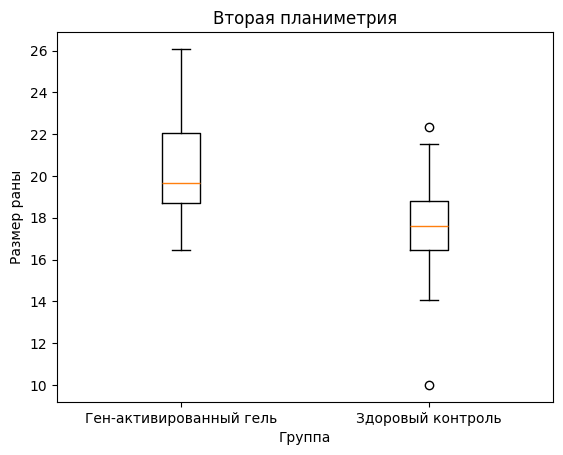

In [ ]:
labels = ['Ген-активированный гель', 'Здоровый контроль']
plt.title('Вторая планиметрия')
plt.xlabel('Группа')
plt.ylabel('Размер раны')
plt.boxplot(x=[GEC_2,DMK_wo_2], labels=labels)
plt.show()

В группе опыта - некорректное измерение. Из-за этого статистически значимые различия

In [ ]:
# Third planimetry
DMK_wo_3 = [11.32327517, 9.646226284, 11.16962441, 10.43200612, 12.40859575, 8.186286498, 13.64644561, 10.55371459,
            10.27147432, 9.235834393, 21.26661209, 11.47892003, 10.92411579, 9.096230058, 9.216504166, 10.25484195, 11.21282251]
DMK_W_3 = [9.95, 12.91, 14.38, 9.90, 14.61510431, 15.85471458, 17.19987409, 19.20426572,
           10.50101603, 13.28410764, 12.17494556, 14.14546809, 12.72742162, 13.12298514, 13.83432452]
GCF_3 = [13.25482727, 19.30740263, 18.37188381, 22.05875189, 15.70216424,
         14.41588826, 15.3112506, 15.19591799, 13.33120471, 13.63271636]
GEC_3 = [12.87475187, 12.13664242, 12.01575399, 13.47500635, 12.86722989, 15.36403278,
         12.47203241, 12.95509147, 13.75564736, 14.90616083, 14.83772091, 22.60809843]

In [ ]:
scores = DMK_wo_3 + DMK_W_3 + GCF_3 + GEC_3
groups = np.repeat(['Здоровый контроль', 'Диабет', 'Гель контроль', 'Гель опыт'], repeats=[len(DMK_wo_3), len(DMK_W_3), len(GCF_3), len(GEC_3)])

tukey_3 = pairwise_tukeyhsd(scores, groups)
print(tukey_3)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1          group2      meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
Гель контроль         Гель опыт  -1.8692 0.4144 -5.0678  1.3294  False
Гель контроль            Диабет  -2.4713 0.1506  -5.521  0.5785  False
Гель контроль Здоровый контроль  -4.8627 0.0004 -7.8398 -1.8856   True
    Гель опыт            Диабет  -0.6021 0.9453 -3.4953  2.2912  False
    Гель опыт Здоровый контроль  -2.9935 0.0332 -5.8101 -0.1769   True
       Диабет Здоровый контроль  -2.3914 0.0898 -5.0378  0.2549  False
----------------------------------------------------------------------


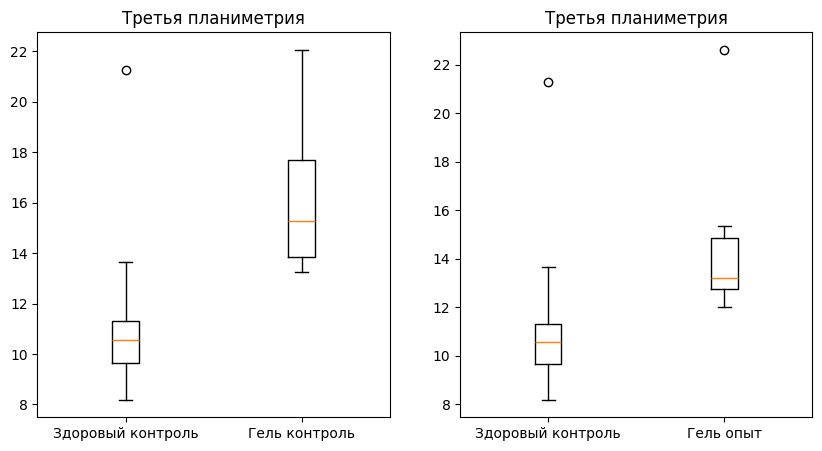

In [ ]:
# Создание субплота с двумя графиками
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Построение боксплота для DMK_wo_3 и GEC_3
plt.title('Forth planimetry')
axs[0].boxplot([DMK_wo_3, GCF_3], labels=['Здоровый контроль', 'Гель контроль'])
axs[0].set_title('Третья планиметрия')

# Построение боксплота для GEC_3 и DMK_W_3
axs[1].boxplot([DMK_wo_3, GEC_3], labels=['Здоровый контроль', 'Гель опыт'])
axs[1].set_title('Третья планиметрия')

# Отображение графиков
plt.show()

In [ ]:
# Forth planimetry
DMK_wo_4 = [4.037246965, 5.652686639, 4.713309519, 4.135753692, 3.864257248,
            5.189774365, 5.015263327, 4.367949278, 4.086017793, 6.389980214, 5.844045366]
DMK_W_4 = [9.050248967, 10.153472, 11.18221974, 12.14335812, 2.053426529,
           8.364011472, 4.294271106, 7.061783755, 8.885900949, 4.076185303, 4.621467492]
GCF_4 = [7.117216947, 11.70464549, 13.41987309, 14.82994904,
         5.78004474, 7.108799607, 5.527119013, 3.503046899, 11.20083027, 7.117216947, 11.70464549, 13.41987309, 14.82994904,
         5.78004474, 7.108799607, 5.527119013, 3.503046899, 11.20083027]
GEC_4 = [4.487775327, 4.645112492, 7.812043617, 8.51480539,
         7.108799607, 5.527119013, 3.503046899, 11.20083027]

In [ ]:
scores = DMK_wo_4 + DMK_W_4 + GCF_4 + GEC_4
groups = np.repeat(['Здоровый контроль', 'Диабет', 'Гель контроль', 'Гель опыт'], repeats=[len(DMK_wo_4), len(DMK_W_4), len(GCF_4), len(GEC_4)])

tukey_4 = pairwise_tukeyhsd(scores, groups)
print(tukey_4)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1          group2      meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
Гель контроль         Гель опыт  -2.3102 0.2968 -5.7769  1.1564  False
Гель контроль            Диабет   -1.466 0.5967 -4.5882  1.6563  False
Гель контроль Здоровый контроль  -4.0651 0.0061 -7.1873 -0.9428   True
    Гель опыт            Диабет   0.8443 0.9332 -2.9466  4.6351  False
    Гель опыт Здоровый контроль  -1.7548 0.6077 -5.5457   2.036  False
       Диабет Здоровый контроль  -2.5991 0.2055 -6.0778  0.8796  False
----------------------------------------------------------------------


In [ ]:
H = st.kruskal(DMK_wo_4, DMK_W_4, GCF_4, GEC_4)
H

KruskalResult(statistic=9.871693075953228, pvalue=0.01968887667021436)

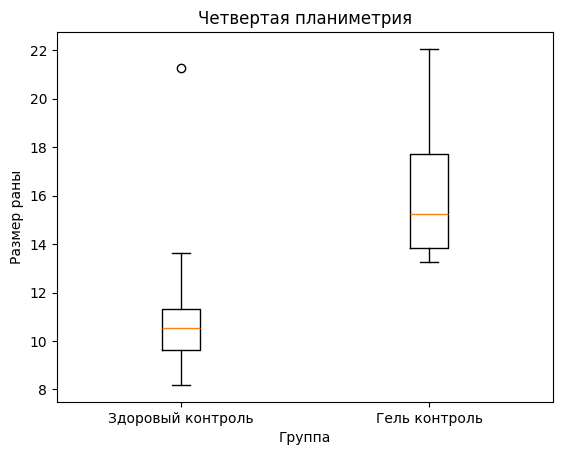

In [ ]:
plt.boxplot([DMK_wo_3, GCF_3], labels=['Здоровый контроль', 'Гель контроль'])
plt.title('Четвертая планиметрия')
plt.xlabel('Группа')
plt.ylabel('Размер раны')
plt.show()

In [ ]:
# Fifth planimetry
DMK_wo_5 = [0.00, 2.55, 0.90, 2.77, 2.91, 3.09]
DMK_W_5 = [3.280709881, 5.370241191, 4.310851365, 1.720983277, 0]
GCF_5 = [0, 5.854716646, 2.757964725]
GEC_5 = [2, 86823144, 2, 954646562, 1, 728000944, 4, 581741665]

In [ ]:
scores = DMK_wo_5 + DMK_W_5 + GCF_5 + GEC_5
groups = np.repeat(['Здоровый контроль', 'Диабет', 'Гель контроль', 'Гель опыт'], repeats=[len(DMK_wo_5), len(DMK_W_5), len(GCF_5), len(GEC_5)])

tukey_5 = pairwise_tukeyhsd(scores, groups)
print(tukey_5)

                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                     
    group1          group2          meandiff    p-adj       lower          upper      reject
--------------------------------------------------------------------------------------------
Гель контроль         Гель опыт  293901537.6291 0.3241 -178303250.3031 766106325.5613  False
Гель контроль            Диабет          0.0657    1.0 -509376644.8597 509376644.9911  False
Гель контроль Здоровый контроль         -0.8342    1.0   -493201816.52 493201814.8515  False
    Гель опыт            Диабет -293901537.5634 0.1942 -691533553.5622 103730478.4353  False
    Гель опыт Здоровый контроль -293901538.4633 0.1596 -670590647.3416  82787570.4149  False
       Диабет Здоровый контроль         -0.8999    1.0 -422352802.9468  422352801.147  False
--------------------------------------------------------------------------------------------


In [ ]:
H = st.kruskal(DMK_wo_5,DMK_W_5,GCF_5,GEC_5)
H

KruskalResult(statistic=3.3325311438278566, pvalue=0.34314051923937594)

# Площадь ран сравнение

In [ ]:
S_CDK_wo_7 = [327.417, 270.466,	95.5858]
S_CDK_wo_14 = [374.793, 221.391, 87.2018, 16.0932]
S_CDK_wo_21 = [430.1378333, 250.2566667, 84.99933333, 21.30566667, 4.318166667]
S_CDK_w_7 = [421.5428, 312.149, 111.96225]
S_CDK_w_14 = [413.7576667, 336.11, 185.306, 69.561]
S_CDK_w_21 = [322.3112, 300.5595, 137.2042, 26.1878, 9.6002]
S_GCF_7 = [381.901, 248.8706667]
S_GCF_14 = [382.074, 281.2668, 254.2048, 97.51]
S_GCF_21 = [377.9392, 344.60575, 162.7682, False, 6,5758]
S_GEF_7 = [332.2345, 322.9586667, 125.406]
S_GEF_14 = [356.3815, 296.50775, 142.28225, 34.39225]
S_GEF_21 = [359.6151667, 388.092, 224.254, 42.94225, 8.0335]

# 1st planimetry
S_wo_DM_0 = np.array([S_CDK_wo_7[0], S_CDK_wo_14[0], S_CDK_wo_21[0]]).mean()
S_w_DM_0 = np.array([S_CDK_w_7[0], S_CDK_w_14[0], S_CDK_w_21[0]]).mean()
S_GCF_all_0 = np.array([S_GCF_7[0], S_GCF_14[0], S_GCF_21[0]]).mean()
S_GEF_all_0 = np.array([S_GEF_7[0], S_GEF_14[0], S_GEF_21[0]]).mean()

# 2nd planimetry
S_wo_DM_1 = np.array([S_CDK_wo_7[1], S_CDK_wo_14[1], S_CDK_wo_21[1]]).mean()
S_w_DM_1 = np.array([S_CDK_w_7[1], S_CDK_w_14[1], S_CDK_w_21[1]]).mean()
S_GCF_all_1 = np.array([S_GCF_7[1], S_GCF_14[1], S_GCF_21[1]]).mean()
S_GEF_all_1 = np.array([S_GEF_7[1], S_GEF_14[1], S_GEF_21[1]]).mean()

# 3rd planimetry
S_wo_DM_2 = np.array([S_CDK_wo_7[2], S_CDK_wo_14[2], S_CDK_wo_21[2]]).mean()
S_w_DM_2 = np.array([S_CDK_w_7[2], S_CDK_w_14[2], CDK_w_21[2]]).mean()
S_GCF_all_2 = np.array([S_GCF_14[2], S_GCF_21[2]]).mean()
S_GEF_all_2 = np.array([S_GEF_7[2], S_GEF_14[2], S_GEF_21[2]]).mean()

# 4th planimetry
S_wo_DM_3 = np.array([S_CDK_wo_14[3], S_CDK_wo_21[3]]).mean()
S_w_DM_3 = np.array([S_CDK_w_14[3], S_CDK_w_21[3]]).mean()
S_GCF_all_3 = np.array([S_GCF_14[3], S_GCF_21[3]]).mean()
S_GEF_all_3 = np.array([S_GEF_14[2], S_GEF_21[3]]).mean()

# 5th planimetry
S_wo_DM_4 = np.array([S_CDK_wo_21[4]]).mean()
S_w_DM_4 = np.array([S_CDK_w_21[4]]).mean()
S_GCF_all_4 = np.array([S_GCF_21[4]]).mean()
S_GEF_all_4 = np.array([S_GEF_21[4]]).mean()

In [ ]:
S_no_DM = [S_wo_DM_0, S_wo_DM_1, S_wo_DM_2, S_wo_DM_3, S_wo_DM_4]
S_DM = [S_w_DM_0, S_wo_DM_1, S_w_DM_2, S_w_DM_3, S_wo_DM_4]
S_GCF_all = [S_GCF_all_0, S_GCF_all_1, S_GCF_all_2, S_GCF_all_3, S_GCF_all_4]
S_GEF_all = [S_GEF_all_0, S_GEF_all_1, S_GEF_all_2, S_GEF_all_3, S_GEF_all_4]
group = ['Control', 'Diabetes', 'Gel-control', 'Gel experiment']
S_df = [S_no_DM, S_DM, S_GCF_all, S_GEF_all]

In [ ]:
new_df = pd.DataFrame(S_df)
new_df = new_df.transpose().rename(columns={0:'Control', 1:'Diabetes', 2:'Gel_control', 3:'Gel_experiment'})
new_df

,Control,Diabetes,Gel_control,Gel_experiment
0,377.449278,385.870556,380.638067,349.410389
1,247.371222,247.371222,291.581072,335.852806
2,89.262311,103.489760,208.486500,163.980750
3,18.699433,47.874400,48.755000,92.612250
4,4.318167,4.318167,6.000000,8.033500


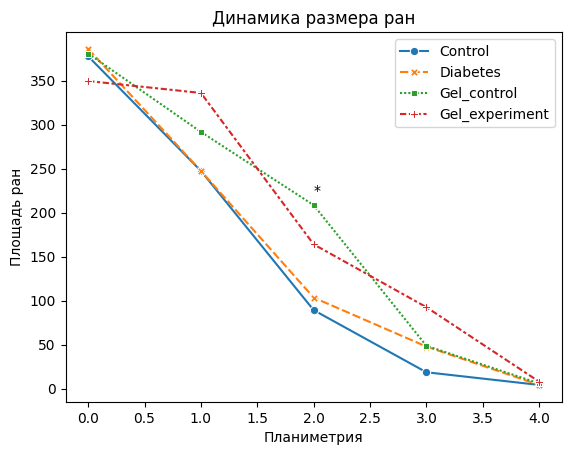

In [ ]:
ax = sns.lineplot(new_df, markers=True)
plt.title('Динамика размера ран')
plt.text(2, 220, '*')
plt.yticks(np.arange(0, 400,step=50))
plt.xlabel('Планиметрия')
plt.ylabel('Площадь ран')
plt.show()

In [ ]:
# Первая планиметрия
S_wo = xlsx_df[(xlsx_df['Группа'] == 'СДК7_minus') | (xlsx_df['Группа'] == 'СДК14_minus') | (
    xlsx_df['Группа'] == 'СДК21_minus')]['Планиметрия 0, мм2'].dropna()
S_w = xlsx_df[(xlsx_df['Группа'] == 'СДК7_plus') | (xlsx_df['Группа'] == 'СДК14_plus') | (
    xlsx_df['Группа'] == 'СДК21_plus')]['Планиметрия 0, мм2'].dropna()
GCF = xlsx_df[(xlsx_df['Группа'] == 'ГКЦ7') | (xlsx_df['Группа'] == 'ГКЦ14') | (
    xlsx_df['Группа'] == 'ГКЦ21')]['Планиметрия 0, мм2'].dropna()
GOF = xlsx_df[(xlsx_df['Группа'] == 'ГОЦ 7') | (xlsx_df['Группа'] == 'ГОЦ14') | (
    xlsx_df['Группа'] == 'ГОЦ21')]['Планиметрия 0, мм2'].dropna()
df_swo = pd.DataFrame(S_wo)
df_sw = pd.DataFrame(S_w)
df_GCF = pd.DataFrame(GCF)
df_GOF = pd.DataFrame(GOF)

In [ ]:
F = st.f_oneway(df_swo['Планиметрия 0, мм2'], df_sw['Планиметрия 0, мм2'], df_GCF['Планиметрия 0, мм2'], df_GOF['Планиметрия 0, мм2'])
F

F_onewayResult(statistic=0.1805021597562244, pvalue=0.9092745553163807)

In [ ]:
H = st.kruskal(df_swo, df_sw, df_GCF, df_GOF)
H

KruskalResult(statistic=array([2.54402064]), pvalue=array([0.46738807]))

In [ ]:
# Вторая планиметрия
S_wo = xlsx_df[(xlsx_df['Группа'] == 'СДК7_minus') | (xlsx_df['Группа'] == 'СДК14_minus') | (
    xlsx_df['Группа'] == 'СДК21_minus')]['Планиметрия 3, мм2'].dropna()
S_w = xlsx_df[(xlsx_df['Группа'] == 'СДК7_plus') | (xlsx_df['Группа'] == 'СДК14_plus') | (
    xlsx_df['Группа'] == 'СДК21_plus')]['Планиметрия 3, мм2'].dropna()
GCF = xlsx_df[(xlsx_df['Группа'] == 'ГКЦ7') | (xlsx_df['Группа'] == 'ГКЦ14') | (
    xlsx_df['Группа'] == 'ГКЦ21')]['Планиметрия 3, мм2'].dropna()
GOF = xlsx_df[(xlsx_df['Группа'] == 'ГОЦ 7') | (xlsx_df['Группа'] == 'ГОЦ14') | (
    xlsx_df['Группа'] == 'ГОЦ21')]['Планиметрия 3, мм2'].dropna()
df_swo = pd.DataFrame(S_wo)
df_sw = pd.DataFrame(S_w)
df_GCF = pd.DataFrame(GCF)
df_GOF = pd.DataFrame(GOF)

In [ ]:
F = st.f_oneway(df_swo['Планиметрия 3, мм2'], df_sw['Планиметрия 3, мм2'],
                df_GCF['Планиметрия 3, мм2'], df_GOF['Планиметрия 3, мм2'])
F

F_onewayResult(statistic=1.8364250957539083, pvalue=0.14894511986042397)

In [ ]:
H = st.kruskal(df_swo, df_sw, df_GCF, df_GOF)
H

KruskalResult(statistic=array([5.19368784]), pvalue=array([0.1581515]))

In [ ]:
# Третья планиметрия
S_wo = xlsx_df[(xlsx_df['Группа'] == 'СДК7_minus') | (xlsx_df['Группа'] == 'СДК14_minus') | (
    xlsx_df['Группа'] == 'СДК21_minus')]['Планиметрия 7, мм2']
S_w = xlsx_df[(xlsx_df['Группа'] == 'СДК7_plus') | (xlsx_df['Группа'] == 'СДК14_plus') | (
    xlsx_df['Группа'] == 'СДК21_plus')]['Планиметрия 7, мм2']
GCF = xlsx_df[(xlsx_df['Группа'] == 'ГКЦ7') | (xlsx_df['Группа'] == 'ГКЦ14') | (
    xlsx_df['Группа'] == 'ГКЦ21')]['Планиметрия 7, мм2']
GOF = xlsx_df[(xlsx_df['Группа'] == 'ГОЦ 7') | (xlsx_df['Группа'] == 'ГОЦ14') | (
    xlsx_df['Группа'] == 'ГОЦ21')]['Планиметрия 7, мм2']
df_swo = pd.DataFrame(S_wo)
df_sw = pd.DataFrame(S_w)
df_GCF = pd.DataFrame(GCF)
df_GOF = pd.DataFrame(GOF)
df_swo = df_swo[df_swo['Планиметрия 7, мм2'] != True]['Планиметрия 7, мм2'].to_numpy()
df_sw = df_sw[df_sw['Планиметрия 7, мм2'] != True]['Планиметрия 7, мм2'].to_numpy()
df_GCF = df_GCF[df_GCF['Планиметрия 7, мм2'] != True]['Планиметрия 7, мм2'].to_numpy()
df_GOF = df_GOF[df_GOF['Планиметрия 7, мм2'] != True]['Планиметрия 7, мм2'].to_numpy()

In [ ]:
F = st.f_oneway(df_swo, df_sw, df_GCF, df_GOF)
F

F_onewayResult(statistic=10.706881198261321, pvalue=2.084089494482905e-05)

In [ ]:
H = st.kruskal(df_swo, df_sw, df_GCF, df_GOF)
H

KruskalResult(statistic=24.47950680272109, pvalue=1.9835686947304e-05)

In [ ]:
df_swo = [100.65, 73.044, 97.937, 85.429, 120.869, 52.607, 146.187, 87.434,
       82.82, 66.961, 103.436, 93.679, 64.952, 66.681, 82.552, 98.696]
df_sw = [77.794, 130.767, 162.289, 76.999, 167.677, 197.327, 232.231,
       289.511, 86.563, 138.527, 116.36, 157.074, 127.16, 135.187, 150.24]
df_GCF = [137.917, 292.629, 264.958, 381.972, 193.548]
df_GOF =[130.121, 115.629, 113.337, 142.537, 129.969, 185.302, 122.108,
       131.75, 148.536, 174.422, 172.824, 401.234]

In [ ]:
scores = df_swo + df_sw + df_GCF + df_GOF
groups = np.repeat(['Здоровый контроль', 'Диабет', 'Гель контроль',
                   'Гель опыт'], repeats=[len(df_swo), len(df_sw), len(df_GCF), len(df_GOF)])

tukey_4 = pairwise_tukeyhsd(scores, groups)
print(tukey_4)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
    group1          group2       meandiff p-adj    lower    upper   reject
--------------------------------------------------------------------------
Гель контроль         Гель опыт   -90.224 0.0332 -175.0457  -5.4024   True
Гель контроль            Диабет -104.4911 0.0078 -186.7801  -22.202   True
Гель контроль Здоровый контроль -165.2089    0.0 -246.8526 -83.5653   True
    Гель опыт            Диабет   -14.267  0.926  -75.9838  47.4498  False
    Гель опыт Здоровый контроль  -74.9849 0.0103 -135.8384 -14.1313   True
       Диабет Здоровый контроль  -60.7179  0.034 -117.9886  -3.4471   True
--------------------------------------------------------------------------


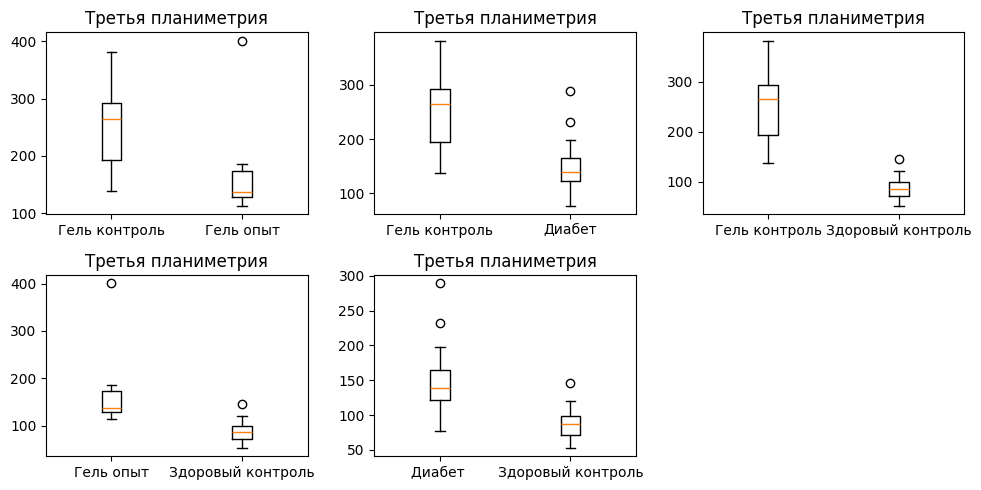

In [ ]:
# Создание субплота с двумя графиками
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

# 
axs[0, 0].boxplot([df_GCF, df_GOF], labels=['Гель контроль', 'Гель опыт'])
axs[0, 0].set_title('Третья планиметрия')

# 

axs[0, 1].boxplot([df_GCF, df_sw], labels=['Гель контроль', 'Диабет'])
axs[0, 1].set_title('Третья планиметрия')

# 
axs[0, 2].boxplot([df_GCF, df_swo], labels=['Гель контроль', 'Здоровый контроль'])
axs[0, 2].set_title('Третья планиметрия')

# 
axs[1, 0].boxplot([df_GOF, df_swo], labels=['Гель опыт', 'Здоровый контроль'])
axs[1, 0].set_title('Третья планиметрия')

# 
axs[1, 1].boxplot([df_sw, df_swo], labels=['Диабет ', 'Здоровый контроль'])
axs[1, 1].set_title('Третья планиметрия')

# Hide empty subplot
axs[1, 2].axis('off')

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
# Четвертая планиметрия
S_wo = xlsx_df[(xlsx_df['Группа'] == 'СДК7_minus') | (xlsx_df['Группа'] == 'СДК14_minus') | (
    xlsx_df['Группа'] == 'СДК21_minus')]['Планиметрия 14, мм2'].dropna()
S_w = xlsx_df[(xlsx_df['Группа'] == 'СДК7_plus') | (xlsx_df['Группа'] == 'СДК14_plus') | (
    xlsx_df['Группа'] == 'СДК21_plus')]['Планиметрия 14, мм2'].dropna()
GCF = xlsx_df[(xlsx_df['Группа'] == 'ГКЦ7') | (xlsx_df['Группа'] == 'ГКЦ14') | (
    xlsx_df['Группа'] == 'ГКЦ21')]['Планиметрия 14, мм2'].dropna()
GOF = xlsx_df[(xlsx_df['Группа'] == 'ГОЦ 7') | (xlsx_df['Группа'] == 'ГОЦ14') | (
    xlsx_df['Группа'] == 'ГОЦ21')]['Планиметрия 14, мм2'].dropna()
df_swo = pd.Series(S_wo)
df_sw = pd.Series(S_w)
df_GCF = pd.Series(GCF)
df_GOF = pd.Series(GOF)

In [ ]:
F = st.f_oneway(df_swo, df_sw, df_GCF, df_GOF)
F

F_onewayResult(statistic=1.2623514613631035, pvalue=0.2943983988641883)

In [ ]:
H = st.kruskal(df_swo, df_sw, df_GCF, df_GOF)
H

KruskalResult(statistic=3.2800446314378204, pvalue=0.3504297316476145)

In [ ]:
# Пятая планиметрия
S_wo = xlsx_df[(xlsx_df['Группа'] == 'СДК7_minus') | (xlsx_df['Группа'] == 'СДК14_minus') | (
    xlsx_df['Группа'] == 'СДК21_minus')]['Планиметрия 21, мм2']
S_w = xlsx_df[(xlsx_df['Группа'] == 'СДК7_plus') | (xlsx_df['Группа'] == 'СДК14_plus') | (
    xlsx_df['Группа'] == 'СДК21_plus')]['Планиметрия 21, мм2']
GCF = xlsx_df[(xlsx_df['Группа'] == 'ГКЦ7') | (xlsx_df['Группа'] == 'ГКЦ14') | (
    xlsx_df['Группа'] == 'ГКЦ21')]['Планиметрия 21, мм2']
GOF = xlsx_df[(xlsx_df['Группа'] == 'ГОЦ 7') | (xlsx_df['Группа'] == 'ГОЦ14') | (
    xlsx_df['Группа'] == 'ГОЦ21')]['Планиметрия 21, мм2']
df_swo = pd.DataFrame(S_wo)
df_sw = pd.DataFrame(S_w)
df_GCF = pd.DataFrame(GCF)
df_GOF = pd.DataFrame(GOF)
df_swo = df_swo[df_swo['Планиметрия 21, мм2'] != True]['Планиметрия 21, мм2'].to_numpy()
df_sw = df_sw[df_sw['Планиметрия 21, мм2'] != True]['Планиметрия 21, мм2'].to_numpy()
df_GCF = df_GCF[df_GCF['Планиметрия 21, мм2'] != True]['Планиметрия 21, мм2'].to_numpy()
df_GOF = df_GOF[df_GOF['Планиметрия 21, мм2'] != True]['Планиметрия 21, мм2'].to_numpy()

In [ ]:
F = st.f_oneway(df_swo, df_sw, df_GCF, df_GOF)
F

F_onewayResult(statistic=0.4194159367567629, pvalue=0.7415450762637039)

In [ ]:
H = st.kruskal(df_swo, df_sw, df_GCF, df_GOF)
H

KruskalResult(statistic=2.480152671755718, pvalue=0.478888620646307)

In [ ]:
hist_morph = pd.read_excel('./Гистоморфометрия.xlsx')
hist_morph

,Group,Time,Animal,Full_defect,Forward_defect
0,ГКЦ,7,А,16.104240,14.60
1,ГКЦ,7,Б,9.008650,7.83
2,ГКЦ,7,В,9.813660,9.46
3,ГКЦ,7,Г,9.011950,8.53
4,ГКЦ,7,Д,11.026150,9.72
5,ГКЦ,7,Е,8.154130,7.70
6,ГКЦ,14,А,4.003060,3.80
7,ГКЦ,14,Б,12.919320,11.95
8,ГКЦ,14,В,17.645920,16.60
9,ГКЦ,14,Г,6.968010,6.65


In [ ]:
ГКЦ_7 = hist_morph[(hist_morph['Group'] == 'ГКЦ') & (hist_morph['Time'] == 7)]['Full_defect'].mean()
ГКЦ_14 = hist_morph[(hist_morph['Group'] == 'ГКЦ') & (hist_morph['Time'] == 14)]['Full_defect'].mean()
ГКЦ_21 = hist_morph[(hist_morph['Group'] == 'ГКЦ') & (hist_morph['Time'] == 21)]['Full_defect'].mean()
groped_df = hist_morph.groupby(['Group', 'Time'], as_index=False).agg({'Full_defect': 'mean'})
groped_df

,Group,Time,Full_defect
0,ГКЦ,7,10.519797
1,ГКЦ,14,10.384077
2,ГКЦ,21,0.069315
3,ГОЦ,7,11.480940
4,ГОЦ,14,5.621557
5,ГОЦ,21,0.355725
6,СДК+,7,13.704618
7,СДК+,14,12.794472
8,СДК+,21,2.230252
9,СДК-,7,9.119555


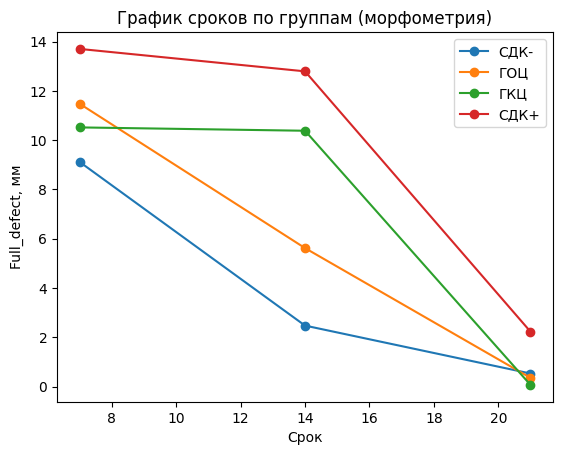

In [ ]:
# данные
groups = ['СДК-', 'ГОЦ', 'ГКЦ', 'СДК+']
x = [7, 14, 21]
y_values = {
    'СДК-': [9.119555, 2.476700, 0.532258],
    'ГОЦ': [11.480940, 5.621557, 0.355725],
    'ГКЦ': [10.519797, 10.384077, 0.069315],
    'СДК+': [13.704618, 12.794472, 2.230252]
}

# построение графика
for group in groups:
    plt.plot(x, y_values[group], marker='o', label=group)

# добавление подписей осей и легенды
plt.xlabel('Срок')
plt.ylabel('Full_defect, мм')
plt.title('График сроков по группам (морфометрия)')
plt.legend()

# отображение графика
plt.show()


In [ ]:
group_data = {
    'СДК-': {
        7: hist_morph[(hist_morph['Group']=='СДК-') & (hist_morph['Time']==7)]['Full_defect'],
        14: hist_morph[(hist_morph['Group']=='СДК-') & (hist_morph['Time']==14)]['Full_defect'],
        21: hist_morph[(hist_morph['Group']=='СДК-') & (hist_morph['Time']==21)]['Full_defect']
    },
    'ГОЦ': {
        7: hist_morph[(hist_morph['Group']=='ГОЦ') & (hist_morph['Time']==7)]['Full_defect'],
        14: hist_morph[(hist_morph['Group']=='ГОЦ') & (hist_morph['Time']==14)]['Full_defect'],
        21: hist_morph[(hist_morph['Group']=='ГОЦ') & (hist_morph['Time']==21)]['Full_defect']
    },
    'ГКЦ': {
        7: hist_morph[(hist_morph['Group']=='ГКЦ') & (hist_morph['Time']==7)]['Full_defect'],
        14: hist_morph[(hist_morph['Group']=='ГКЦ') & (hist_morph['Time']==14)]['Full_defect'],
        21: hist_morph[(hist_morph['Group']=='ГКЦ') & (hist_morph['Time']==21)]['Full_defect']
    },
    'СДК+': {
        7: hist_morph[(hist_morph['Group']=='СДК+') & (hist_morph['Time']==7)]['Full_defect'],
        14: hist_morph[(hist_morph['Group']=='СДК+') & (hist_morph['Time']==14)]['Full_defect'],
        21: hist_morph[(hist_morph['Group']=='СДК+') & (hist_morph['Time']==21)]['Full_defect']
    }
}

In [ ]:
# Статистических значимые отличия между группами на 7 сутки
group_compare_7 = st.kruskal(group_data['СДК-'][7], group_data['СДК+'][7], group_data['ГКЦ'][7], group_data['ГОЦ'][7])
print('Статистически значимые различия на 7 сутки {}'.format('отсутствуют' if group_compare_7.pvalue > 0.05 else 'имеются'))

# Статистических значимые отличия между группами на 14 сутки
group_compare_14 = st.kruskal(group_data['СДК-'][14], group_data['СДК+'][14], group_data['ГКЦ'][14], group_data['ГОЦ'][14])
print('Статистически значимые различия на 14 сутки {}'.format('отсутствуют' if group_compare_14.pvalue > 0.05 else 'имеются'))

# Статистических значимые отличия между группами на 14 сутки
group_compare_21 = st.kruskal(group_data['СДК-'][21], group_data['СДК+'][21], group_data['ГКЦ'][21], group_data['ГОЦ'][21])
print('Статистически значимые различия на 21 сутки {}'.format('отсутствуют' if group_compare_21.pvalue > 0.05 else 'имеются'))


Статистически значимые различия на 7 сутки отсутствуют
Статистически значимые различия на 14 сутки имеются
Статистически значимые различия на 21 сутки имеются


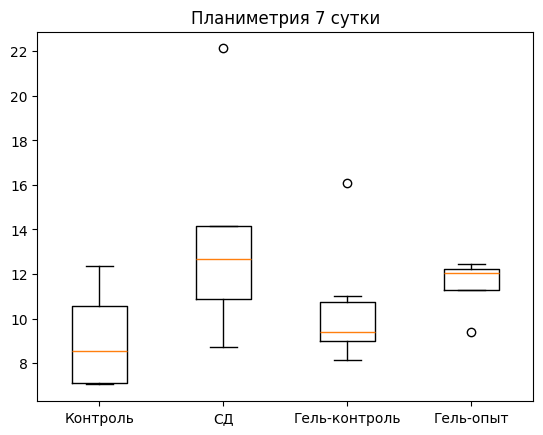

In [ ]:
plt.boxplot([group_data['СДК-'][7], group_data['СДК+'][7], group_data['ГКЦ'][7], group_data['ГОЦ'][7]], labels=['Контроль', "СД", "Гель-контроль", "Гель-опыт"])
plt.title('Планиметрия 7 сутки')
plt.show()

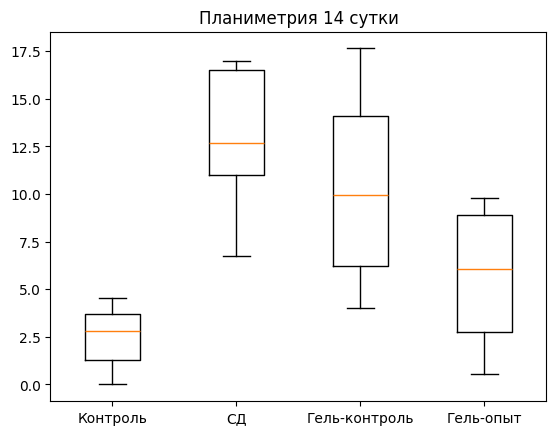

In [ ]:
plt.boxplot([group_data['СДК-'][14], group_data['СДК+'][14], group_data['ГКЦ'][14], group_data['ГОЦ'][14]], labels=['Контроль', "СД", "Гель-контроль", "Гель-опыт"])
plt.title('Планиметрия 14 сутки')
plt.show()

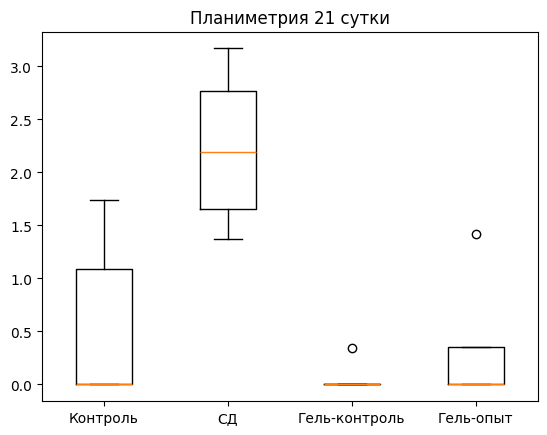

In [ ]:
plt.boxplot([group_data['СДК-'][21], group_data['СДК+'][21], group_data['ГКЦ'][21], group_data['ГОЦ'][21]], labels=['Контроль', "СД", "Гель-контроль", "Гель-опыт"])
plt.title('Планиметрия 21 сутки')
plt.show()

In [ ]:
dunn_14 = sp.posthoc_dunn([group_data['СДК-'][14], group_data['СДК+'][14], group_data['ГКЦ'][14], group_data['ГОЦ'][14]], p_adjust='holm')
dunn_14

,1,2,3,4
1,1.000000,0.032212,0.118545,0.773385
2,0.032212,1.000000,0.773385,0.314183
3,0.118545,0.773385,1.000000,0.555979
4,0.773385,0.314183,0.555979,1.000000


In [ ]:
dunn_21 = sp.posthoc_dunn([group_data['СДК-'][21], group_data['СДК+'][21], group_data['ГКЦ'][21], group_data['ГОЦ'][21]], p_adjust='holm')
dunn_21

,1,2,3,4
1,1.000000,0.080517,1.000000,1.000000
2,0.080517,1.000000,0.029163,0.071861
3,1.000000,0.029163,1.000000,1.000000
4,1.000000,0.071861,1.000000,1.000000
